In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from text_utils import *
import re
import spacy
import pickle
nlp = spacy.load('en')

In [3]:
review_df = pd.read_csv('https://raw.githubusercontent.com/skinssong/BIA_660D/master/Final_Project/data_gathering/final_df.csv',sep='|',)
review_df.head(2)

,TweetID,TweetTime,TweetText,TimeZone,FollowerCount,entity,anger,disgust,fear,joy,sadness,sentiment,sent_score,text_length
0,979572206341623809,2018-03-30 04:13:07.953,it s weird that guillermo del toro s fish ban...,Pacific Time (US & Canada),188,"['Guillermo del Toro', 'fish banging movie', '...",0.159886,0.192974,0.206119,0.125385,0.390025,positive,0.828112,92
1,979572451632820226,2018-03-30 04:14:06.430,pacific rim uprising is not the well oiled gen...,None,34,"['Pacific Rim Uprising', 'huge smile', 'maste...",0.059327,0.090333,0.059227,0.447096,0.080857,positive,0.684166,117


In [4]:
review_df = review_df[~review_df['sent_score'].isnull()]

In [5]:
review_df['TweetText'] = review_df['TweetText'].apply(text_preprocessing)
Text_df = review_df.drop_duplicates(subset='TweetText')
Text_df.shape

(15126, 14)

In [6]:
Text_df.index = Text_df['TweetID']
Text_df.drop('TweetID', axis=1, inplace=True)
Text_df.head()

/home/saul/miniconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TweetTime,TweetText,TimeZone,FollowerCount,entity,anger,disgust,fear,joy,sadness,sentiment,sent_score,text_length
TweetID,,,,,,,,,,,,,
979572206341623809,2018-03-30 04:13:07.953,it s weird that guillermo del toro s fish bang...,Pacific Time (US & Canada),188,"['Guillermo del Toro', 'fish banging movie', '...",0.159886,0.192974,0.206119,0.125385,0.390025,positive,0.828112,92
979572451632820226,2018-03-30 04:14:06.430,pacific rim uprising is not the well oiled gen...,None,34,"['Pacific Rim Uprising', 'huge smile', 'maste...",0.059327,0.090333,0.059227,0.447096,0.080857,positive,0.684166,117
979572687428136961,2018-03-30 04:15:02.757,never not love you or pacific rim,None,41,['pacific rim'],0.088473,0.074744,0.091248,0.179551,0.148831,neutral,0.000000,34
979572774308999170,2018-03-30 04:15:23.430,imagine it s a leg of a mech robot pacific rim...,None,42,"['Pacific rim uprising', 'Haha makati', 'mech']",0.026008,0.047309,0.168051,0.711549,0.093490,positive,0.432736,88
979572774590205952,2018-03-30 04:15:23.943,pacific rim the first one,None,69,['Pacific Rim'],0.093829,0.070243,0.084134,0.395426,0.187606,positive,0.540238,27


<h1> remove almost identical reviews </h1>

In [7]:
vectorizer = CountVectorizer(stop_words='english')
vecs = vectorizer.fit_transform(Text_df['TweetText'])
vecs = normalize(vecs, norm='l2',axis=1)

In [8]:
sim_matrix = (vecs * vecs.T).A
sim_df = pd.DataFrame(sim_matrix, index = Text_df.index, columns=Text_df.index)
sim_df['sentiment'] = Text_df['sentiment']
sim_df.iloc[:5,:5]

TweetID,979572206341623809,979572451632820226,979572687428136961,979572774308999170,979572774590205952
TweetID,,,,,
979572206341623809,1.000000,0.181818,0.348155,0.181818,0.426401
979572451632820226,0.181818,1.000000,0.348155,0.272727,0.426401
979572687428136961,0.348155,0.348155,1.000000,0.348155,0.816497
979572774308999170,0.181818,0.272727,0.348155,1.000000,0.426401
979572774590205952,0.426401,0.426401,0.816497,0.426401,1.000000


In [9]:
if 'remove_id' in vars():
    pass
else:
    with open('remove_id.pickle','rb') as f:
        remove_id = pickle.load(f)

In [10]:
Text_df[Text_df.index.isin(remove_id)].tail()

,TweetTime,TweetText,TimeZone,FollowerCount,entity,anger,disgust,fear,joy,sadness,sentiment,sent_score,text_length
TweetID,,,,,,,,,,,,,
983940883044237312,2018-04-11 05:32:42.547,omg i remember now what a wild kaiju period we...,Eastern Time (US & Canada),893,"['Pacific Rim Godzilla', 'Godzilla Kong Sk...",0.034438,0.099650,0.456738,0.289360,0.311326,negative,-0.350203,119
983941410348044288,2018-04-11 05:34:48.090,did this awesome pacific rim spideypool au art...,None,28,"['Rim spideypool au', 'htt']",0.020093,0.086537,0.057112,0.792745,0.053086,positive,0.625245,107
983943466378915841,2018-04-11 05:42:58.490,cine from today pacific rim all shows,New Delhi,439,"['Pacific Rim', 'cine', 'shows']",0.072869,0.090140,0.083909,0.317040,0.216154,positive,0.930655,41
983954441526300672,2018-04-11 06:26:34.967,inside the mind of pacific rim uprising s anim...,London,909,"['Pacific Rim Uprising', 'animation director ...",0.152316,0.069028,0.032607,0.388166,0.137047,neutral,0.000000,69
983956880103038976,2018-04-11 06:36:16.290,pacific rim uprising imax trailer movieclips t...,None,91,"['Rim Uprising IMAX', 'Movieclips Trailers']",0.065560,0.075686,0.316399,0.101683,0.084201,neutral,0.000000,59


In [11]:
print_key_word_sentence('satisfies with cathartic chaos',Text_df)

pacific rim sequel satisfies with cathartic chaos


pacific rim sequel satisfies with cathartic chaos via




In [9]:
with open('./sim_dict.pickle','rb') as f:
    sim_dict = pickle.load(f)
with open('./remove_id.pickle','rb') as f:
    remove_id = pickle.load(f)

In [ ]:
# Fuzzy Match algorithm, used in final version

In [ ]:
def filter_high_sim():
    remove_id = set()
    sim_dict = dict()
    n = sim_df.shape[0]
    for i in range(n):
        if Text_df.index[i] not in remove_id:
            i_index = sim_df.index[i]
            sim_dict[i_index] = set()
            s1 = Text_df.loc[i_index, 'TweetText']
            for j in range(i+1, n):
                j_index = sim_df.index[j]
                if j_index not in remove_id:
                    s2 = Text_df.loc[j_index, 'TweetText']
                    if SM(None, s1, s2).ratio()>=0.85:
                        remove_id.add(j_index)
                        sim_dict[i_index].add(j_index)
    return sim_dict, remove_id

sim_dict, remove_id = filter_high_sim()

<h1> Customed collocation </h1>

In [12]:
with open('gram_dict.pickle','rb') as f:
    gram_dict = pickle.load(f)

In [13]:
Text_df = Text_df[~Text_df.index.isin(remove_id)]

In [14]:
entity_dict = {}
def filter_entity(entity_list):
    entity_list = ast.literal_eval(entity_list)
    pacific_rim = ('pacific rim, pacific rim uprising')
    filtered_list = []
    for entity in np.array(entity_list):
        entity = re.sub('\s+', ' ', entity.lower())
        if entity not in pacific_rim:
            if entity in entity_dict.keys():
                entity_dict[entity]+=1
            else:
                entity_dict[entity]=1
            filtered_list.append(entity)
    return np.NaN if len(filtered_list)==0 else filtered_list

Text_df['entity'] = Text_df['entity'].apply(filter_entity)

In [15]:
frequent_entity_dict = {key: value for key,value in entity_dict.items() if ' ' in key and value>5}
collocations = pd.Series(frequent_entity_dict).sort_values()
collocations.index = pd.Series(collocations.index).apply(pacific_rim_filtering)

In [16]:
collocations_dict = collocations.groupby(by=collocations.index).sum().sort_values(ascending=False)
gram_list = collocations_dict.index
gram_list = gram_list.tolist()
gram_list = ['pacific rim uprising'] + gram_list 
gram_list[:10]

['pacific rim uprising',
 'pacific rim',
 'ready player',
 'john boyega',
 'black panther',
 'tomb raider',
 'giant robots',
 'quiet place',
 'star wars',
 'good movie']

In [17]:
collocations_dict

pacific rim                1038
ready player                265
john boyega                 127
black panther                99
tomb raider                  79
giant robots                 64
quiet place                  50
star wars                    37
good movie                   31
guillermo del toro           31
private screening            30
power rangers                29
del toro                     27
scott eastwood               25
box office                   24
movie review                 24
infinity war                 23
giant monsters               20
love simon                   19
mako mori                    17
daddy yo                     16
neon genesis evangelion      16
great movie                  15
charlie hunnam               13
duck duck goose              13
movie date                   13
idris elba                   12
good time                    12
avengers infinity war        12
red sparrow                  12
                           ... 
bad movi

In [18]:
gram_list = sorted(gram_list, key=lambda x: len(x.split(' ')), reverse=True)
gram_dict = {i: re.sub(' ', '_', i) for i in gram_list}
gram_dict.pop('',None)
gram_dict.pop('gt gt gt')
gram_dict.keys()

dict_keys(['pacific rim uprising', 'guillermo del toro', 'neon genesis evangelion', 'duck duck goose', 'avengers infinity war', 'rim tomb raider', 'steven s deknight', 'rim the uprising', 'rim ready player', 'quiet place ready', 'movie ready player', 'kong skull island', 'uprising gipsy avenger', 'pacific rim', 'ready player', 'john boyega', 'black panther', 'tomb raider', 'giant robots', 'quiet place', 'star wars', 'good movie', 'private screening', 'power rangers', 'del toro', 'scott eastwood', 'box office', 'movie review', 'infinity war', 'giant monsters', 'love simon', 'mako mori', 'daddy yo', 'great movie', 'charlie hunnam', 'movie date', 'idris elba', 'good time', 'red sparrow', 'worst movie', 'best thing', 'saber athena', 'fun movie', 'favorite movie', 'bad reviews', 'special effects', 'best movie', 'favorite movies', 'gipsy danger', 'ramin djawadi', 'raleigh becket', 'new episode', 'big fan', 'double feature', 'liwen shao', 'hey guys', 'big robots', 'steven deknight', 'good thi

In [19]:
def custom_colloc(sentence):
    for i in gram_dict.keys():
        if i in sentence:
            sentence = re.sub(i, gram_dict[i], sentence)
    return sentence

Text_df['TweetText'] = Text_df['TweetText'].apply(custom_colloc)
review_df['TweetText'] = review_df['TweetText'].apply(custom_colloc)

<h1> Word CLoud for positive reviews and negtive reviews </h1>

In [20]:
pos_df = Text_df[Text_df['sentiment'] == 'positive']
neu_df = Text_df[Text_df['sentiment'] == 'neutral']
neg_df = Text_df[Text_df['sentiment'] == 'negative']

/home/saul/Documents/BIA660/Final Project/text_utils.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.drop_duplicates(subset='TweetText',inplace=True)


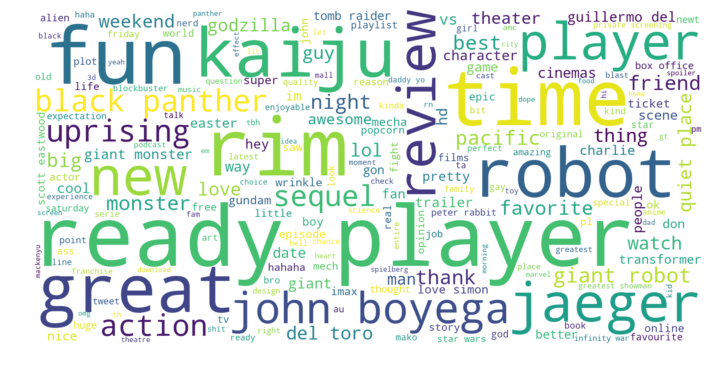

In [21]:
pos_cloud = word_cloud_entity(pos_df)

In [21]:
with open('pos_cloud.jpg','w') as image:
    pos_cloud.to_file(image)

/home/saul/Documents/BIA660/Final Project/text_utils.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.drop_duplicates(subset='TweetText',inplace=True)


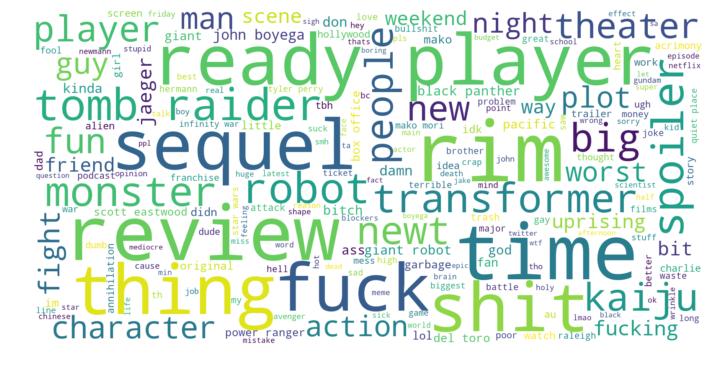

In [20]:
neg_cloud = word_cloud_entity(neg_df)
with open('neg_cloud.jpg','w') as image:
    neg_cloud.to_file(image)

<h1> language modeling using Doc2Vec</h1>

In [22]:
Text_df = Text_df[~Text_df.index.isin(remove_id)]

In [23]:
single_characters = ('b','c','d','e','f','g','h','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z')

def filter_token(token):
    #filter punctuation, space, stop words
    return token.is_punct or token.is_space or token.is_stop or token.text in single_characters

def lemmatized_sentence_corpus(sentence):
    parsed_review = nlp(sentence)
    return ' '.join([token.lemma_ for token in parsed_review if not filter_token(token)])

all_reviews = Text_df['TweetText'].apply(lemmatized_sentence_corpus)

In [24]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence

def labelize_tweets_ug(tweets):
    result = []
    for i, t in zip(tweets.index, tweets):
        t = t.split()
        result.append(LabeledSentence(t, [str(i)]))
    return result

labelled_sentence = labelize_tweets_ug(all_reviews)

/home/saul/miniconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  


In [25]:
len(labelled_sentence)

13113

In [26]:
from gensim import corpora
d2v_model = Doc2Vec(dm=0, vector_size=100, negative=5, window=10, min_count=2, alpha=0.065, min_alpha=0.065)
d2v_model.build_vocab(labelled_sentence)

texts = []
for i in all_reviews:
    tokens = nlp(i)
    stemmed_tokens = [token.lemma_ for token in tokens if token not in spacy.lang.en.STOP_WORDS]
    texts.append(stemmed_tokens)
    
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_above=0.5, no_below=5,)
dictionary.compactify()
copus = [dictionary.doc2bow(text) for text in texts]

In [27]:
from sklearn import utils
for epoch in range(30):
    d2v_model.train(utils.shuffle(labelled_sentence), total_examples=len(labelled_sentence), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

In [28]:
def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        vecs[n] = model.docvecs[str(i)]
        n += 1
    return vecs

tweet_vecs = get_vectors(d2v_model, Text_df['TweetText'], 100)

In [29]:
Vec_df = pd.DataFrame(tweet_vecs, index=Text_df.index)
Vec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
TweetID,,,,,,,,,,,,,,,,,,,,,
979572206341623809,0.215821,-0.145548,-0.128395,0.061937,0.296034,-0.371756,-0.187919,-0.035048,0.153463,-0.625183,...,-0.100557,0.016480,0.046008,0.066025,0.092235,-0.126891,-0.093285,0.118090,-0.351290,-0.147254
979572451632820226,-0.145277,0.188851,0.039102,0.165705,0.102090,0.089176,-0.177329,-0.550308,-0.112707,-0.095103,...,0.291637,-0.149615,0.099595,-0.286853,0.045971,0.007981,-0.003489,-0.204134,-0.293186,0.093189
979572687428136961,-0.049173,0.025738,-0.040386,-0.011461,0.175293,-0.045467,0.051659,-0.212516,0.054870,-0.156649,...,-0.012259,0.016958,-0.074956,-0.055250,0.123741,0.004379,0.038133,-0.131872,-0.025022,-0.014790
979572774308999170,-0.057808,-0.161069,0.023407,-0.053572,0.390675,-0.024235,-0.059828,-0.337141,-0.309225,-0.156648,...,0.067363,-0.129010,-0.065610,-0.204141,0.024353,-0.020761,0.397747,-0.471679,0.189721,-0.135642
979572774590205952,-0.002096,0.004092,-0.000670,-0.004301,-0.004994,0.002445,0.000898,-0.003480,-0.004164,-0.001565,...,-0.001261,-0.003965,-0.001858,0.003199,-0.001872,0.003311,-0.002917,-0.000663,0.002254,-0.000061


In [30]:
# from gensim.scripts.glove2word2vec import glove2word2vec
# glove_twitter = glove2word2vec()

import gensim.downloader as api
glove_twitter = api.load("glove-twitter-100")

def get_w2v(tweet, size, vectors, aggregation='mean'):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tweet.split():
        try:
            vec += vectors[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if aggregation == 'mean':
        if count != 0:
            vec /= count
        return vec
    elif aggregation == 'sum':
        return vec

In [31]:
from sklearn.preprocessing import scale
vec_glove_mean = scale(np.concatenate([get_w2v(z, 100, glove_twitter, 'mean') for z in Text_df['TweetText']]))

In [32]:
glove_df = pd.DataFrame(vec_glove_mean, index=Text_df.index)
print(glove_df.shape)
glove_df.head()

(13113, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
TweetID,,,,,,,,,,,,,,,,,,,,,
979572206341623809,0.804177,-0.592743,-0.749541,0.788732,-0.445806,0.868432,-1.290389,0.167716,-0.267777,-0.163544,...,0.514665,0.403040,-1.741689,1.146119,0.691125,-0.389677,0.358568,-0.479548,-0.489910,-0.641564
979572451632820226,0.004932,-0.328555,-0.398873,1.117463,0.729707,0.707093,0.023958,-0.292494,0.450421,-0.000569,...,-0.454963,-0.724849,0.777102,-0.903658,-0.708213,0.172267,0.283634,-0.620222,-0.547370,-0.440015
979572687428136961,-1.365550,-1.049386,-0.658206,2.048991,-1.811656,0.808238,2.274969,0.265640,1.012609,1.419429,...,0.321360,0.066695,-0.984694,1.341112,-1.074405,-0.719521,-1.848647,-0.918153,-0.072505,-0.041090
979572774308999170,1.499700,-0.164836,0.386802,-0.059821,-0.603555,0.645415,-0.102170,-0.871488,-0.076477,0.101951,...,0.304019,-1.313746,0.617119,0.204065,-0.830348,-1.167717,0.340124,-0.236101,-0.626421,0.062817
979572774590205952,0.492196,0.219664,2.455526,0.091514,1.066096,0.151087,0.027719,0.239918,-1.547539,-0.716993,...,0.636423,-0.123057,-0.289302,-1.879258,0.823521,0.867061,-0.455476,-2.088677,0.444790,1.649325


In [33]:
from sklearn.model_selection import train_test_split
y=Text_df['sent_score']
X_train2, X_test2, y_train2, y_test2 = train_test_split(glove_df, y, test_size=0.2,random_state=0)
def train_pred_sum(model,X_train, y_train, X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(mean_squared_error(y_test, y_pred))
    pred = pd.Series(y_pred, index=y_test.index)
    return pred

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(n_estimators=500,verbose=True,n_jobs=8, oob_score=True)
y_pred_rf = train_pred_sum(rf, X_train2, y_train2, X_test2, y_test2)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    8.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   38.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:  1.6min finished


0.22651339106384077


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


In [35]:
from sklearn.svm import SVR
svm = SVR(C=0.4, kernel='rbf',verbose=True)
y_pred_svm = train_pred_sum(svm,X_train2, y_train2, X_test2, y_test2)

[LibSVM]0.18096651969130365


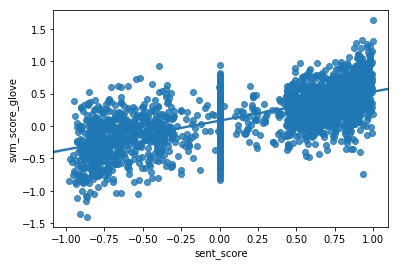

In [36]:
y_pred_svm.name = 'svm_score_glove'
pred = pd.DataFrame([y_test2, y_pred_svm]).T
import seaborn as sns
sns.regplot(x='sent_score', y='svm_score_glove', data=pred)

In [37]:
review_df = review_df[~review_df.index.duplicated(keep='first')]
text_length = np.log2(review_df[review_df.index.isin(Vec_df.index)]['text_length'])/20
X = pd.concat([Vec_df,text_length], axis=1)
y = Text_df['sent_score']

In [38]:
X.drop('text_length', axis=1,inplace=True)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf2 = RandomForestRegressor(n_estimators=500,verbose=True,n_jobs=8, oob_score=True)
y_pred_rf2 = train_pred_sum(rf2, X_train, y_train, X_test, y_test)
y_pred_rf2.name='y_pred_rf2'

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    9.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   42.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:  1.8min finished


0.25575477106791816


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


In [43]:
svm2 = SVR(C=110, kernel='rbf',verbose=True)
y_pred_svm2 = train_pred_sum(svm2, X_train, y_train, X_test, y_test)
y_pred_svm2.name='y_pred_svm2'

[LibSVM]0.23685553922426242


In [44]:
rf.oob_score_

0.2677635361651288

In [54]:
y_pred_rf.name = 'rf_score_glove'
y_pred_rf2.name = 'rf_score_doc2vec'
y_pred_svm2.name = 'svm_score_doc2vec'

In [55]:
y_pred_df = pd.DataFrame([y_pred_rf, y_pred_svm, y_pred_rf2, y_pred_svm2, y_test2]).T
y_pred_df.head()

,rf_score_glove,svm_score_glove,rf_score_doc2vec,svm_score_doc2vec,sent_score
TweetID,,,,,
980104475514847232,0.180850,0.242422,0.154959,0.130748,0.000000
979846873988190209,-0.094524,-0.163200,0.115490,0.089227,0.000000
981596794063814656,-0.104762,-0.454742,-0.046848,-0.152790,-0.677382
980871712433565696,0.026758,-0.179231,-0.003363,0.071437,0.000000
983393280573370368,-0.094654,-0.358311,0.166027,0.662713,0.000000


In [56]:
y_pred_df.columns

Index(['rf_score_glove', 'svm_score_glove', 'rf_score_doc2vec',
       'svm_score_doc2vec', 'sent_score'],
      dtype='object')

In [57]:
y_pred_df['average'] = (y_pred_rf + y_pred_svm + y_pred_rf2 + y_pred_svm2)/4

In [58]:
y_pred_df['sentiment'] = Text_df[Text_df.index.isin(y_pred_df.index)]['sentiment']

In [59]:
mean_squared_error(y_pred_df['sent_score'], y_pred_df['average'])

0.19523743963871157

In [60]:
y_pred_df.to_csv('pred_df.csv')

<h1> prediction comparison </h1>

In [61]:
y_pred_df.head()

,rf_score_glove,svm_score_glove,rf_score_doc2vec,svm_score_doc2vec,sent_score,average,sentiment
TweetID,,,,,,,
980104475514847232,0.180850,0.242422,0.154959,0.130748,0.000000,0.177245,neutral
979846873988190209,-0.094524,-0.163200,0.115490,0.089227,0.000000,-0.013252,neutral
981596794063814656,-0.104762,-0.454742,-0.046848,-0.152790,-0.677382,-0.189785,negative
980871712433565696,0.026758,-0.179231,-0.003363,0.071437,0.000000,-0.021100,neutral
983393280573370368,-0.094654,-0.358311,0.166027,0.662713,0.000000,0.093944,neutral


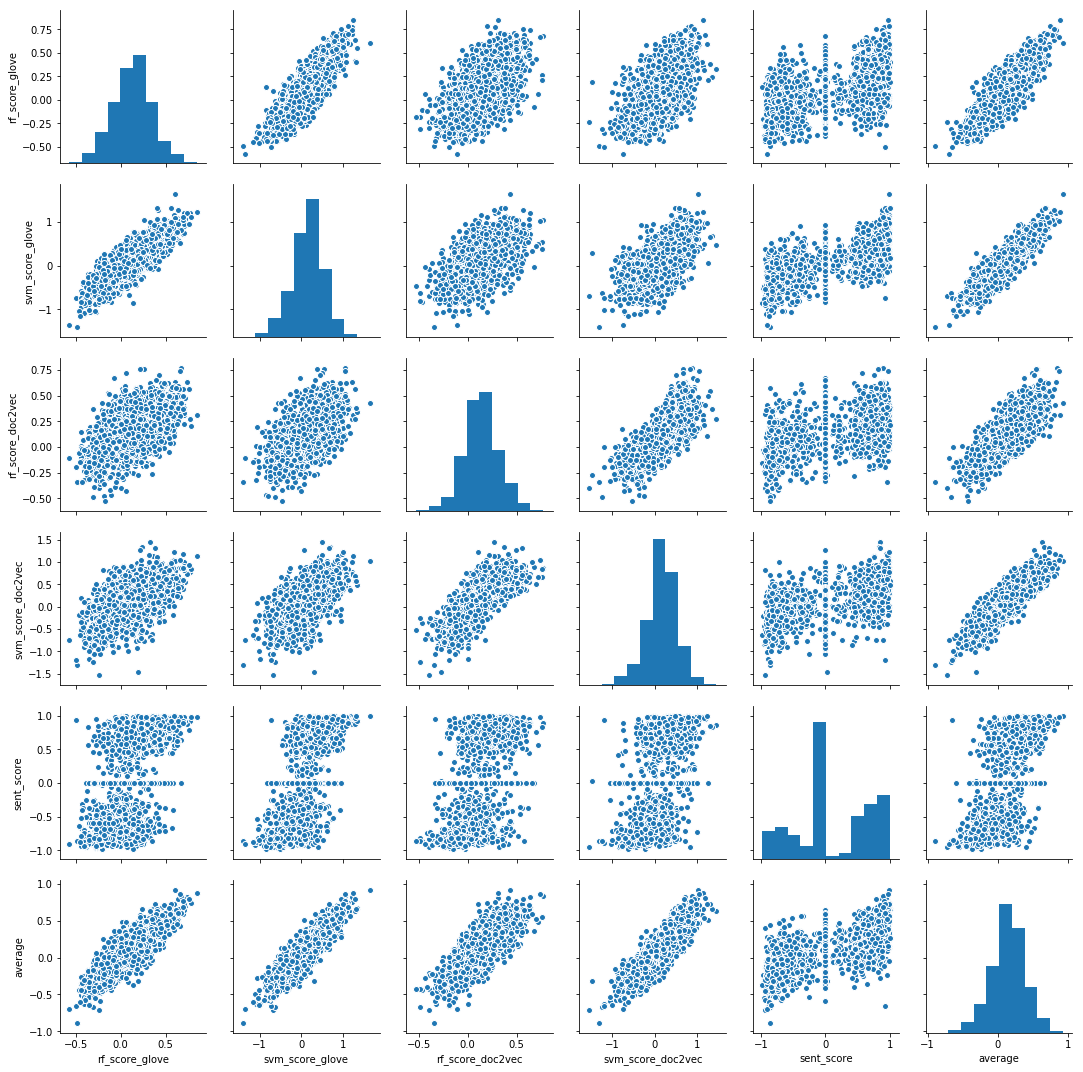

In [62]:
sns.pairplot(data=y_pred_df)

In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_absolute_error(y_pred_df['sent_score'],np.zeros(2623,)))
print(mean_squared_error(y_pred_df['sent_score'],np.zeros(2623,)))

0.4511788110306265
0.3313368592267448


In [67]:
print(mean_absolute_error(y_pred_df['sent_score'],(y_pred_df['svm_score_glove']+y_pred_df['svm_score_doc2vec'])/2))
print(mean_squared_error(y_pred_df['sent_score'],(y_pred_df['svm_score_glove']+y_pred_df['svm_score_doc2vec'])/2))

0.34529614356457045
0.17961199133174172


In [68]:
print(mean_absolute_error(y_pred_df['sent_score'],(y_pred_df['svm_score_glove'])))
print(mean_squared_error(y_pred_df['sent_score'],(y_pred_df['svm_score_glove'])))

0.3415401761768027
0.18096651969130365


In [69]:
print(mean_absolute_error(y_pred_df['sent_score'],(y_pred_df['svm_score_glove']+y_pred_df['rf_score_glove'])/2))
print(mean_squared_error(y_pred_df['sent_score'],(y_pred_df['svm_score_glove']+y_pred_df['rf_score_glove'])/2))

0.35887104194555547
0.18993289529266844


In [70]:
pred_df = pd.read_csv('pred_df.csv', index_col='TweetID')
pred_df.head()

,rf_score_glove,svm_score_glove,rf_score_doc2vec,svm_score_doc2vec,sent_score,average,sentiment
TweetID,,,,,,,
980104475514847232,0.180850,0.242422,0.154959,0.130748,0.000000,0.177245,neutral
979846873988190209,-0.094524,-0.163200,0.115490,0.089227,0.000000,-0.013252,neutral
981596794063814656,-0.104762,-0.454742,-0.046848,-0.152790,-0.677382,-0.189785,negative
980871712433565696,0.026758,-0.179231,-0.003363,0.071437,0.000000,-0.021100,neutral
983393280573370368,-0.094654,-0.358311,0.166027,0.662713,0.000000,0.093944,neutral


<h1> LDA Model </h1>

In [ ]:
from gensim.models import LdaModel
ldamodel = LdaModel(corpus=copus,id2word=dictionary, num_topics=30, passes=20)

In [ ]:
ldamodel.print_topics(num_topics=10, num_words=10)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim

LDAvis_prepared = pyLDAvis.gensim.prepare(ldamodel, copus,dictionary)
pyLDAvis.display(LDAvis_prepared)

In [ ]:
with open('lda_vis.html','w') as f:
    pyLDAvis.save_html(LDAvis_prepared, f)

In [ ]:
def lda_description(review_text, min_topic_freq=0.03, max_number=5):
    #parse the review with spaCy
    print(review_text)
    review_text = custom_colloc(review_text)
    parsed_review = nlp(review_text)

    
    #remove stopwords
    parsed_review = [token.lemma_ for token in parsed_review if token not in spacy.lang.en.STOP_WORDS]
    print(parsed_review)
    #create bag-of-words representation
    review_bow = dictionary.doc2bow(parsed_review)
    print(review_bow)
    #create an LDA representation
    review_lda = ldamodel[review_bow]

    #sort with highly related topics first
#     review_lda = sorted(review_lda, key=lambda topic_freq: -topic_freq[1])
    
    topic_numbers = list()
    for topic_number, freq in review_lda:
            topic_numbers.append((topic_number, freq))
            
    return(topic_numbers)

In [ ]:
lda_description('pacific rim uprising is a movie with giant robots fighting each other')

In [ ]:
ldamodel.print_topic(5)

In [ ]:
print(dictionary)